In [ ]:
import cv2 as cv
import os
import pandas as pd
import numpy as np

In [ ]:
dataset=[]
folder_paths=["/content/drive/MyDrive/male",
            "/content/drive/MyDrive/female"]
for i in folder_paths:
  folder_name=os.path.basename(i)
  for file_name in os.listdir(i):
    img_path=os.path.join(i,file_name)
    if os.path.isfile(img_path):
      img=cv.imread(img_path, cv.IMREAD_GRAYSCALE)
      if img is not None:
        resize_img=cv.resize(img,(150,150))
        flattened_img=resize_img.flatten().tolist()
        dataset.append(flattened_img+[folder_name])



In [ ]:
df = pd.DataFrame(dataset)

## **Data Visualization**

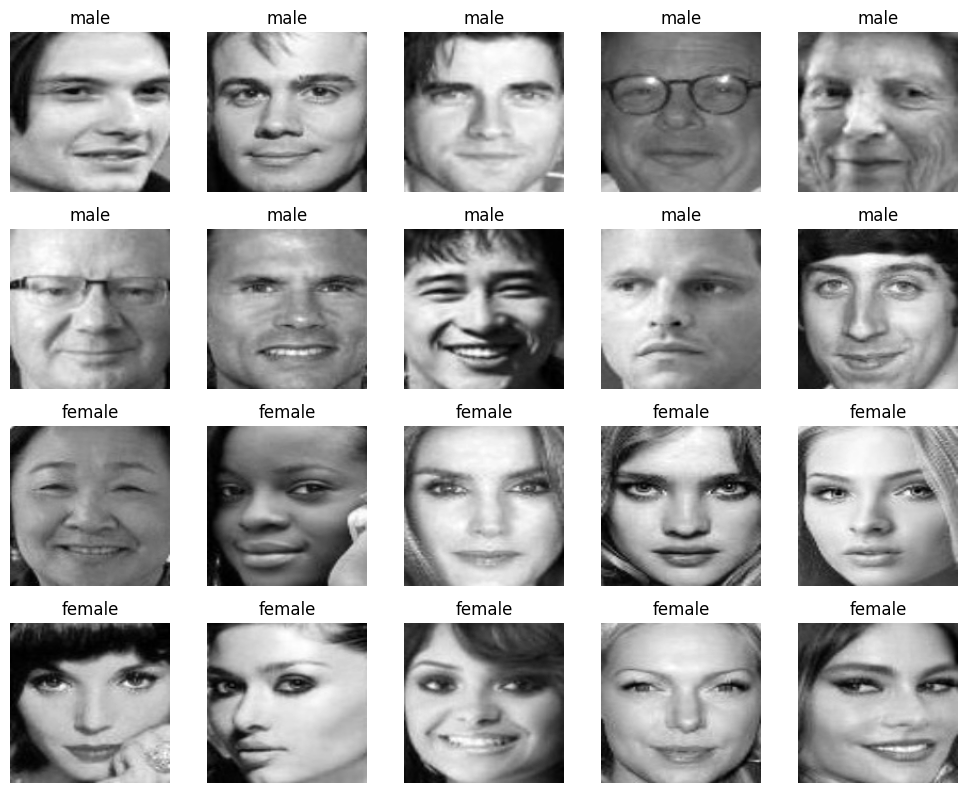

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Your dataset and organization code...

num_samples_to_visualize = 10

# Dictionary to store images for each category
category_images = {"male": [], "female": []}

# Organize images by category
for data in dataset:
    img_data = data[:-1]
    label = data[-1]
    category_images[label].append(img_data)

# Plot sample images
plt.figure(figsize=(10, 10))
for label, images in category_images.items():
    for i in range(num_samples_to_visualize):
        plt.subplot(5, 5, i + 1 + num_samples_to_visualize * list(category_images.keys()).index(label))
        img_data = images[i]
        img_array = np.array(img_data, dtype=np.uint8).reshape(150, 150)
        plt.imshow(img_array, cmap='gray')
        plt.title(label)
        plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,22500
0,58,53,42,34,32,30,32,34,39,44,...,22,24,24,24,24,23,24,24,25,male
1,49,49,49,49,49,47,45,41,36,32,...,101,96,91,74,51,45,41,45,47,male
2,1,2,4,7,9,14,19,21,24,25,...,98,104,109,112,116,120,124,126,128,male
3,33,34,36,38,40,43,47,49,51,53,...,149,168,186,200,209,209,206,200,197,male
4,76,75,73,70,68,67,67,65,62,60,...,112,108,103,100,102,112,118,118,118,male


**Renaming Target**

In [ ]:
df.rename(columns={df.iloc[:,-1].name:'Target'},inplace=True)


In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,Target
0,58,53,42,34,32,30,32,34,39,44,...,22,24,24,24,24,23,24,24,25,male
1,49,49,49,49,49,47,45,41,36,32,...,101,96,91,74,51,45,41,45,47,male
2,1,2,4,7,9,14,19,21,24,25,...,98,104,109,112,116,120,124,126,128,male
3,33,34,36,38,40,43,47,49,51,53,...,149,168,186,200,209,209,206,200,197,male
4,76,75,73,70,68,67,67,65,62,60,...,112,108,103,100,102,112,118,118,118,male


**Lets Randomize the Data**

In [ ]:
#get num of rows of dataset
num_rows=len(df)
#generate permutated indices
permuted_indices=np.random.permutation(num_rows)
#generate random data
random_df=df.iloc[permuted_indices]

**Encoding the label**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
x=random_df.drop('Target',axis=1)
x=x/255
x.head()

,0,1,2,3,4,5,6,7,8,9,...,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
1395,0.564706,0.537255,0.490196,0.490196,0.505882,0.572549,0.627451,0.643137,0.654902,0.658824,...,0.482353,0.478431,0.498039,0.525490,0.545098,0.560784,0.533333,0.505882,0.470588,0.447059
511,0.294118,0.298039,0.301961,0.274510,0.231373,0.207843,0.184314,0.227451,0.274510,0.290196,...,0.227451,0.223529,0.219608,0.219608,0.219608,0.227451,0.247059,0.262745,0.262745,0.262745
1325,0.376471,0.380392,0.388235,0.396078,0.400000,0.294118,0.172549,0.176471,0.184314,0.223529,...,0.101961,0.113725,0.109804,0.101961,0.094118,0.090196,0.113725,0.125490,0.109804,0.101961
96,0.035294,0.031373,0.027451,0.023529,0.023529,0.019608,0.019608,0.015686,0.015686,0.011765,...,0.180392,0.184314,0.188235,0.184314,0.184314,0.184314,0.184314,0.184314,0.188235,0.188235
1876,0.196078,0.176471,0.145098,0.125490,0.117647,0.141176,0.149020,0.149020,0.149020,0.152941,...,0.086275,0.082353,0.078431,0.070588,0.070588,0.078431,0.086275,0.094118,0.101961,0.109804


In [ ]:
encoder=LabelEncoder()
y=random_df.Target
y_encoded=encoder.fit_transform(y)
y_series=pd.Series(y_encoded,name='target')


In [ ]:
df_encoded=pd.concat([x,y_series],axis=1)
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,22491,22492,22493,22494,22495,22496,22497,22498,22499,target
1395,0.564706,0.537255,0.490196,0.490196,0.505882,0.572549,0.627451,0.643137,0.654902,0.658824,...,0.478431,0.498039,0.525490,0.545098,0.560784,0.533333,0.505882,0.470588,0.447059,1
511,0.294118,0.298039,0.301961,0.274510,0.231373,0.207843,0.184314,0.227451,0.274510,0.290196,...,0.223529,0.219608,0.219608,0.219608,0.227451,0.247059,0.262745,0.262745,0.262745,1
1325,0.376471,0.380392,0.388235,0.396078,0.400000,0.294118,0.172549,0.176471,0.184314,0.223529,...,0.113725,0.109804,0.101961,0.094118,0.090196,0.113725,0.125490,0.109804,0.101961,0
96,0.035294,0.031373,0.027451,0.023529,0.023529,0.019608,0.019608,0.015686,0.015686,0.011765,...,0.184314,0.188235,0.184314,0.184314,0.184314,0.184314,0.184314,0.188235,0.188235,1
1876,0.196078,0.176471,0.145098,0.125490,0.117647,0.141176,0.149020,0.149020,0.149020,0.152941,...,0.082353,0.078431,0.070588,0.070588,0.078431,0.086275,0.094118,0.101961,0.109804,0


## **Classification Using Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree


In [ ]:
model_dt=DecisionTreeClassifier(splitter='random')

In [ ]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(splitter='random')

In [ ]:
y_pred=model_dt.predict(x_test)

Accuracy Score is : 0.6376811594202898
Classification report:               precision    recall  f1-score   support

           0       0.64      0.67      0.66       214
           1       0.63      0.60      0.62       200

    accuracy                           0.64       414
   macro avg       0.64      0.64      0.64       414
weighted avg       0.64      0.64      0.64       414



<Axes: >

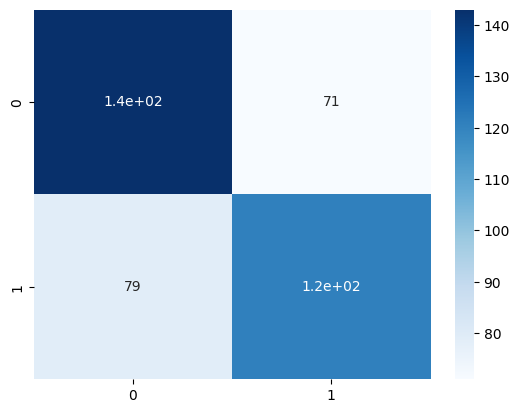

In [ ]:
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy Score is :",accuracy)
C_report=classification_report(y_pred,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

**Testing our model by giving a random input image**

Text(0.5, 1.0, 'female')

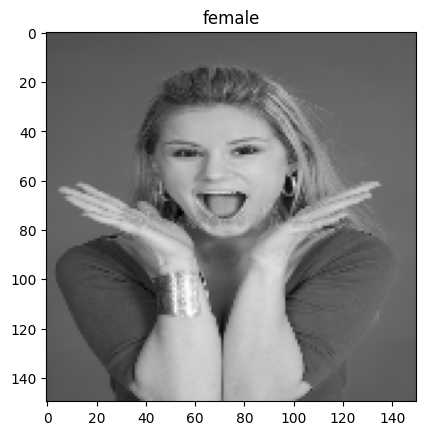

In [ ]:
image_path='/content/drive/MyDrive/fe.jpeg'
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=model_dt.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)

In [ ]:
import joblib
trained_model=joblib.dump(model_svc,'gender_classificaation_DT.joblib')

 # Classification Using KNN

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_KNN=KNeighborsClassifier()

In [ ]:
model_KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model_KNN.predict(x_test)

Accuracy Score is : 0.7681159420289855
Classification report:               precision    recall  f1-score   support

           0       0.72      0.82      0.77       194
           1       0.82      0.72      0.77       220

    accuracy                           0.77       414
   macro avg       0.77      0.77      0.77       414
weighted avg       0.78      0.77      0.77       414



<Axes: >

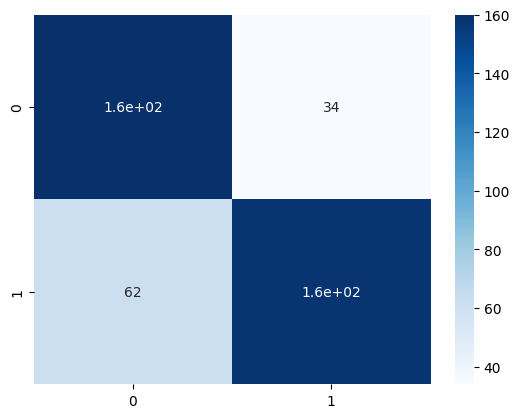

In [ ]:
accuracy=accuracy_score(y_pred,y_test)
print("Accuracy Score is :",accuracy)
C_report=classification_report(y_pred,y_test)
print('Classification report:',C_report)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,cmap='Blues')

**Testing our model by giving a random input image**

Text(0.5, 1.0, 'male')

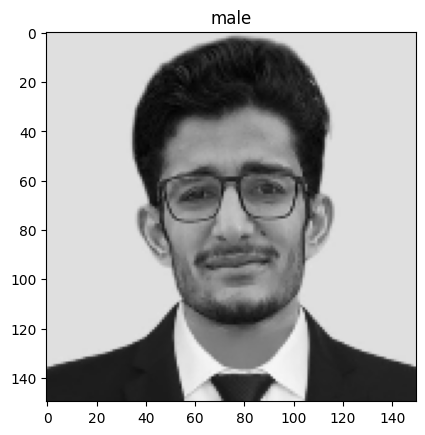

In [ ]:
image_path='/content/drive/MyDrive/WhatsApp Image 2023-08-21 at 07.03.43.jpg'
#read input image
img=cv.imread(image_path,cv.IMREAD_GRAYSCALE)
#resize input image
resized_img=cv.resize(img,(150,150))
#flatten input image
flattened_img=resized_img.flatten()
#normalizing image pixels
normalized_img=flattened_img/255.0
#reshape user image
reshaped_img=normalized_img.reshape(1,-1)
#make prediction
prediction=model_KNN.predict(reshaped_img)
#decode the input class
decoded_prediction=encoder.inverse_transform(prediction)[0]
image = cv.cvtColor(resized_img, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(decoded_prediction)

In [ ]:
import joblib
trained_model=joblib.dump(model_svc,'gender_classificaation_KNN.joblib')